In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
data=pd.read_csv("/content/Sales_data.csv")

In [183]:
data.shape

(9994, 19)

In [184]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

## Data Cleaning

In [186]:
data.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
customer,0
manufactory,0
product_name,0
segment,0
category,0
subcategory,0
region,0


In [187]:
data.duplicated().sum()

np.int64(1)

In [188]:
data.drop_duplicates(inplace=True)

In [189]:
data.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


## Exploratory Data Analysis

### 1. Sales Analysis

*   **Total Sales by Region**: Calculates the sum of sales for each geographical region and visualizes this distribution using a bar chart. The output shows which regions contribute most to overall sales.
*   **Total Sales by Category**: Similarly, sales are aggregated by product category, and the results are visualized with a bar chart, highlighting the performance of different product categories.
*   **Total Sales by Segment**: Sales are grouped by customer segment (e.g., Consumer, Corporate, Home Office) and displayed as a bar chart, revealing which customer groups are most lucrative.

In [190]:
total_sales_by_region = data.groupby('region')['sales'].sum().reset_index()
print(total_sales_by_region)

    region        sales
0  Central  501239.8908
1     East  678499.8680
2    South  391721.9050
3     West  725457.8245


In [191]:
import plotly.express as px

fig = px.bar(total_sales_by_region, x='region', y='sales', title='Total Sales by Region',text_auto=True)
fig.update_layout(xaxis_title='Region', yaxis_title='Total Sales')
fig.show()

In [192]:
total_sales_by_category = data.groupby('category')['sales'].sum().reset_index()
print(total_sales_by_category)

          category        sales
0        Furniture  741718.4233
1  Office Supplies  719047.0320
2       Technology  836154.0330


In [193]:
fig = px.bar(total_sales_by_category, x='category', y='sales', title='Total Sales by Category',text_auto=True)
fig.update_layout(xaxis_title='Region', yaxis_title='Total Sales')
fig.show()

In [194]:
total_sales_by_segment = data.groupby('segment')['sales'].sum().reset_index()
print(total_sales_by_segment)

       segment         sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.293718e+05


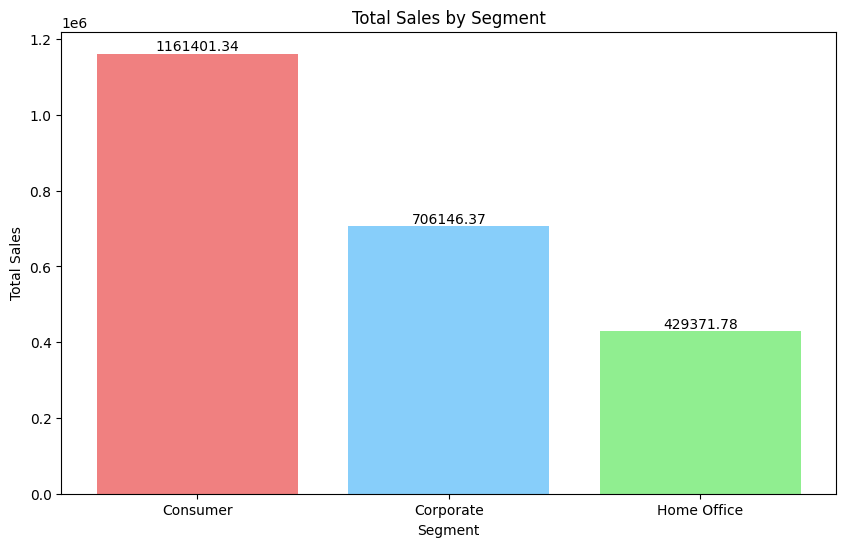

In [195]:
plt.figure(figsize=(10, 6))
plt.bar(total_sales_by_segment['segment'], total_sales_by_segment['sales'], color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Segment')

# Add labels to the bars
for index, row in total_sales_by_segment.iterrows():
    plt.text(row['segment'], row['sales'], f'{row['sales']:.2f}', ha='center', va='bottom')

plt.show()

### 2. Profitability Analysis

*   **Total Profit by Region**: This analysis calculates and visualizes the total profit generated from each region, allowing for an understanding of regional profitability.
*   **Top 10 Most Profitable Products**: The code identifies the products that yield the highest profits by summing profit for each product and then displaying the top 10. A bar chart is generated to visually represent these top profitable products, including labels for clarity.

In [196]:
total_profit_by_region = data.groupby('region')['profit'].sum().reset_index()
print(total_profit_by_region)

    region       profit
0  Central   39706.3625
1     East   91534.8388
2    South   46749.4303
3     West  108418.4489


In [197]:
fig=px.bar(total_profit_by_region,x='region',y='profit',title='Total Profit by Region',text_auto=True)
fig.update_layout(xaxis_title='Region', yaxis_title='Total Profit')
fig.show()

In [198]:
total_profit_by_product=data.groupby('product_name')['profit'].sum().reset_index()
print(total_profit_by_product)

                                           product_name    profit
0     "While you Were Out" Message Book, One Form pe...   10.3880
1              #10 Gummed Flap White Envelopes, 100/Box   16.7678
2                         #10 Self-Seal White Envelopes   52.1230
3            #10 White Business Envelopes,4 1/8 x 9 1/2  223.1408
4               #10- 4 1/8" x 9 1/2" Recycled Envelopes  115.2806
...                                                 ...       ...
1844  iKross Bluetooth Portable Keyboard + Cell Phon...  115.6440
1845                         iOttie HLCRIO102 Car Mount  -11.9940
1846                                iOttie XL Car Mount  -50.3748
1847  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...  171.2648
1848                 netTALK DUO VoIP Telephone Service  430.4180

[1849 rows x 2 columns]


In [199]:
total_profit_by_product = data.groupby('product_name')['profit'].sum().reset_index()
top_10_profitable_products = total_profit_by_product.sort_values(by='profit', ascending=False).head(10)
print(top_10_profitable_products)

                                           product_name      profit
404               Canon imageCLASS 2200 Advanced Copier  25199.9280
649   Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
804                Hewlett Packard LaserJet 3310 Copier   6983.8836
400                  Canon PC1060 Personal Laser Copier   4570.9347
786   HP Designjet T520 Inkjet Large Format Printer ...   4094.9766
165                   Ativa V4110MDD Micro-Cut Shredder   3772.9461
19     3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
1275  Plantronics Savi W720 Multi-Device Wireless He...   3696.2820
894                Ibico EPK-21 Electric Binding System   3345.2823
1839                  Zebra ZM400 Thermal Label Printer   3343.5360


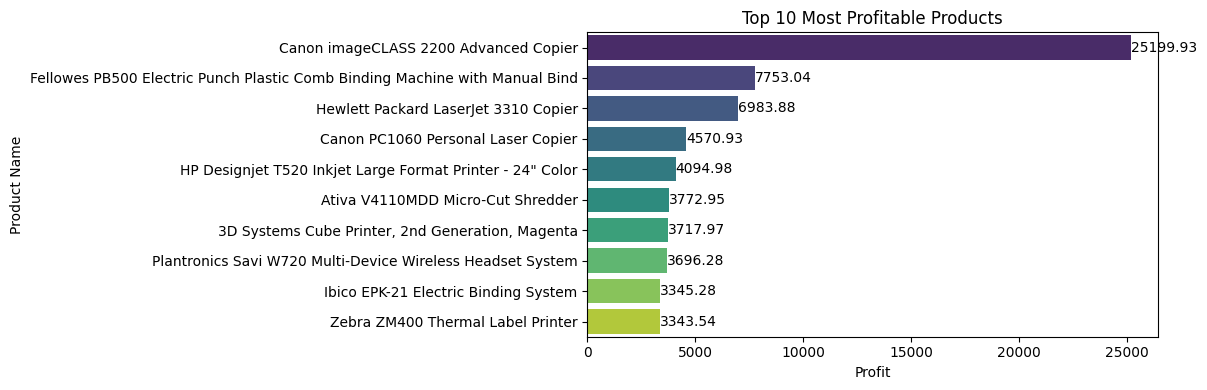

In [200]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='profit', y='product_name', data=top_10_profitable_products, hue='product_name', legend=False, palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product Name')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

### 3. Customer Behavior Analysis

This section focuses on understanding customer purchasing patterns and trends, encompassing the following aspects:

*   **Identify Top Customers by Sales**: It calculates the total sales for each customer and then identifies the top 10 customers based on their sales contribution. A bar chart is used to visualize these high-value customers and their respective sales amounts.
*   **Analyze Customer Purchase Frequency**: The analysis determines the number of unique orders placed by each customer, providing insight into how often customers make purchases. A histogram is generated to show the distribution of these purchase frequencies.
*   **Analyze Average Order Value by Customer**: This subtask calculates the average sales amount per order for each customer, reflecting their typical spending per transaction. A histogram is then created to visualize the distribution of these average order values among the customer base.

# Top 10 Customers


In [201]:
total_sales_by_customer = data.groupby('customer')['sales'].sum().reset_index()
top_10_customers = total_sales_by_customer.sort_values(by='sales', ascending=False).head(10)
print(top_10_customers)

               customer      sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072


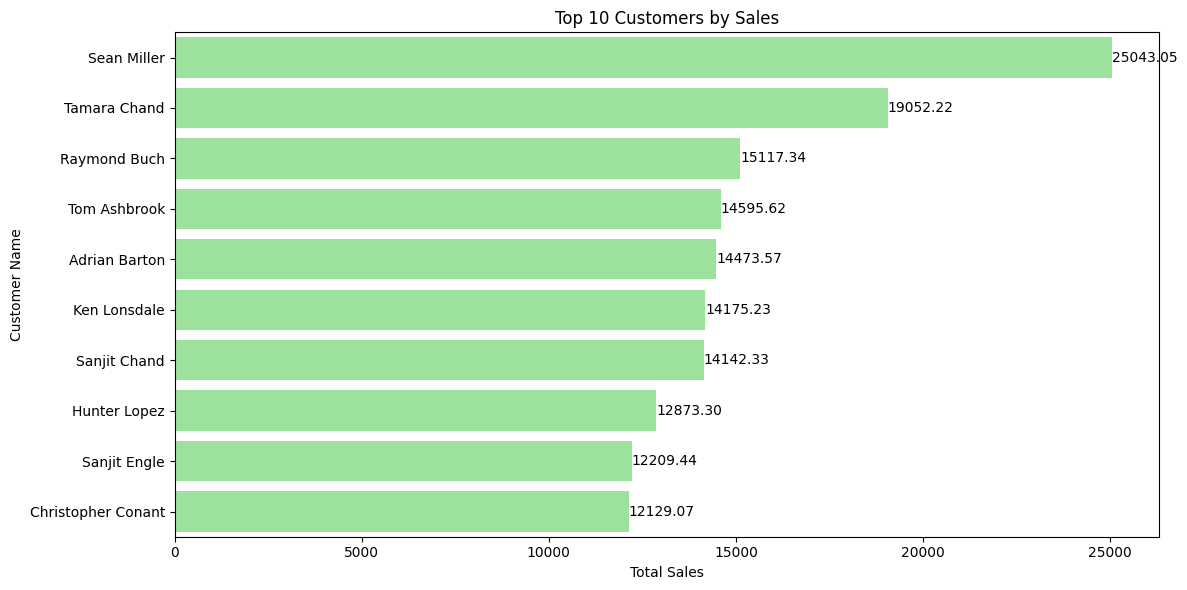

In [202]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='sales', y='customer', data=top_10_customers, color='lightgreen')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

#  Customer Purchase Frequency Distribution

In [203]:
customer_purchase_frequency = data.groupby('customer')['order_id'].nunique().reset_index()
customer_purchase_frequency.rename(columns={'order_id': 'unique_orders'}, inplace=True)
print(customer_purchase_frequency.head())

          customer  unique_orders
0    Aaron Bergman              3
1    Aaron Hawkins              7
2   Aaron Smayling              7
3  Adam Bellavance              8
4        Adam Hart             10


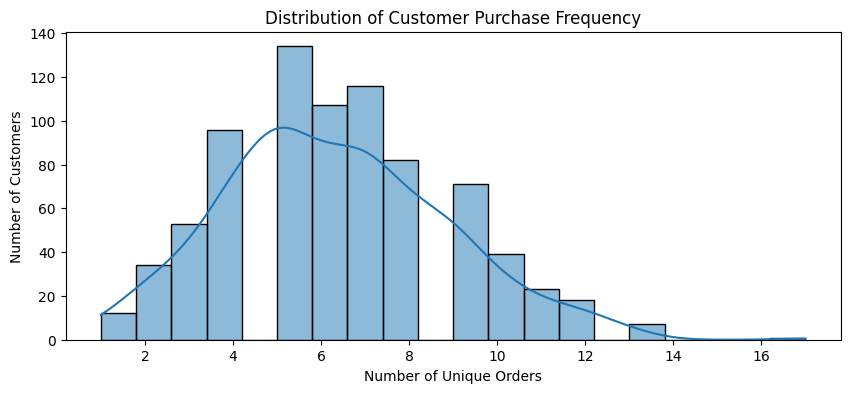

In [204]:
plt.figure(figsize=(10, 4))
sns.histplot(customer_purchase_frequency['unique_orders'], bins=20, kde=True)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Unique Orders')
plt.ylabel('Number of Customers')
plt.show()

## Analyze Average Order Value by Customer

Calculate the average sales amount per order for each customer to understand their typical spending per transaction.
First I have calculated the total sales for each individual order placed by each customer. Then, I have computed the average of these order sales for each customer to get their average order value.


In [205]:
customer_order_sales = data.groupby(['customer', 'order_id'])['sales'].sum().reset_index()
avg_order_value_by_customer = customer_order_sales.groupby('customer')['sales'].mean().reset_index()
avg_order_value_by_customer.rename(columns={'sales': 'average_order_value'}, inplace=True)
print(avg_order_value_by_customer.head())

          customer  average_order_value
0    Aaron Bergman           295.385333
1    Aaron Hawkins           249.242857
2   Aaron Smayling           435.813143
3  Adam Bellavance           969.452500
4        Adam Hart           325.033700


## Visualize Average Order Value Distribution


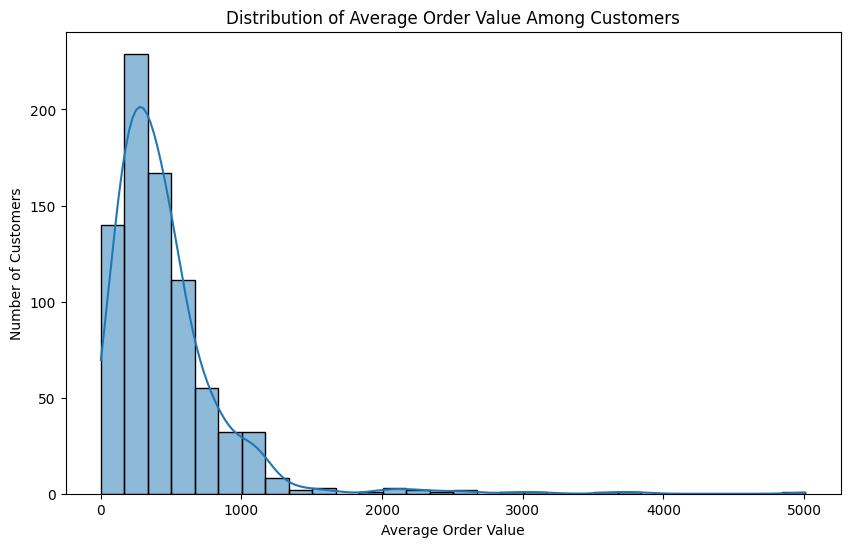

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(avg_order_value_by_customer['average_order_value'], bins=30, kde=True)
plt.title('Distribution of Average Order Value Among Customers')
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.show()